**Particle in a 1D box**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText

from custom.plot_utils import plot_1dbox_infinite_walls

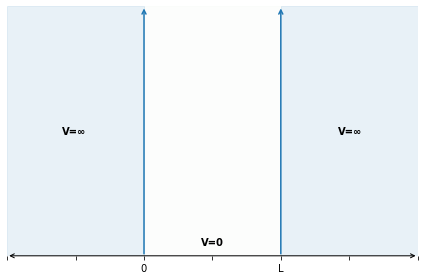

In [2]:
plot_1dbox_infinite_walls()

First, we consider a free particle whose motion is confined to a 1D box of zero potential energy between x=0 and x=L.
The Schrödinger equation reads

$-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} = E\psi(x)$


The most general solution, $\psi$, of this equation is:

${\psi }_{k}(x)=A_k\sin{kx}+{B}_k\cos{kx}$

where A, B are arbitrary costants determined by the boundary conditions.

Now subjected to the boundary conditions given by

$\psi(0)=\psi(L)=0$

$\psi_k(0)=A_k\sin{(k0)}+B_k\cos{(k0)}=B_k=0$

$B_k=0$

$\psi_k(x)=A_k\sin{kx}$

The constant A is determined by the normalization condition to be $\sqrt{2/L}$.

The corresponding energies are:

$E = n^2\frac{\pi^2\hbar^2}{2mL^2}$

The wave functions that correspond to these energy values are:

$\psi(x)=\sqrt{\frac{2}{L}}\sin\frac{n\pi x}{L}$

where

$n=1,2,3\dots$

Full theory: https://en.wikipedia.org/wiki/Particle_in_a_box

**Define $\psi(x)$**

In [3]:
def psi(n, L, x):
      psi = A = np.sqrt(2/L)
      psi = A*np.sin(n*np.pi*x/L)
      return psi

In [4]:
def solve_f(n, L, x, sample_size):
      # solve f(x) for n
      f = np.zeros(sample_size)
      for i in range(sample_size):
            f[i]=psi(n,L,x[i])
      return f

**Define the parameters**

In [5]:
L = 10
n_list = [1, 2, 3, 4, 5, 6]
sample_size = 100
x = np.linspace(0, L, sample_size)

**Solve $f(x)$ for n=1,2,3,4,5,6**

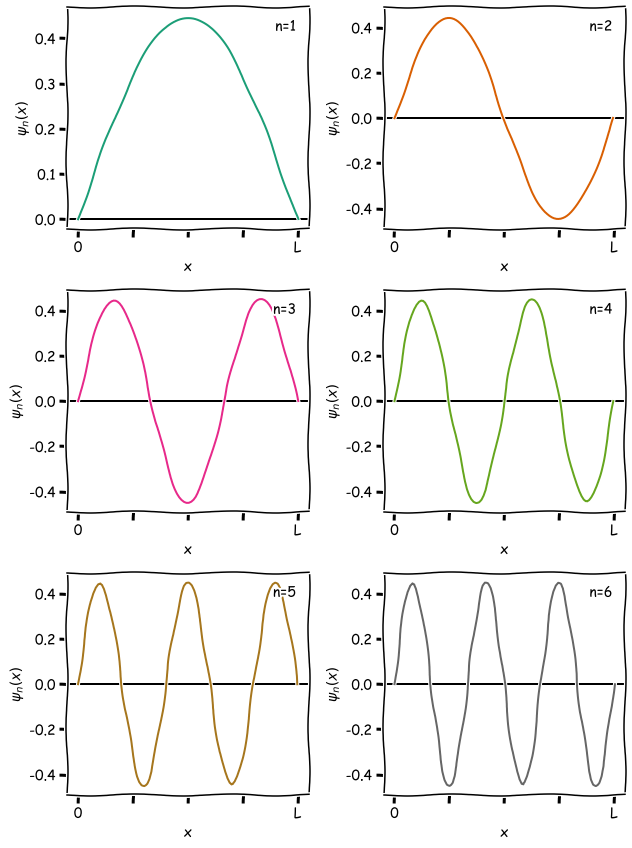

In [6]:
with plt.xkcd():
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9, 12))
    axes = ax.ravel()
    
    cmap =  plt.cm.get_cmap("Dark2", len(n_list))

    for n in n_list:
        i = n-1
        f = solve_f(n, L, x, sample_size)
        axes[i].plot(x, f, color=cmap(i))

        xmin, xmax = axes[i].get_xlim()
        axes[i].hlines(y=0, xmin=xmin, xmax=xmax, color="k", zorder=1)

        axes[i].set_xlabel("x")
        axes[i].set_ylabel("$\psi_n(x)$")

        zeros = [0, L]
        step = L/4
        zero_labels = dict(zip(zeros, ["0", "L"]))
        xticks = np.arange(0, L+step, step)
        xlabels = ["" if x not in zeros else zero_labels[x] for x in xticks]
        axes[i].set_xticks(xticks)
        axes[i].set_xticklabels(xlabels)
        
        axes[i].margins(x=0)
        at = AnchoredText(f"n={n}", frameon=False, loc="upper right")
        axes[i].add_artist(at)

    fig.tight_layout()
    plt.show()